# Klinkenberg Effect

In [49]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt 

from sklearn.linear_model import LinearRegression

***Note** : All the data (values) used for calculations are obtained experimentally in laboratory.*

## Porosity determination:

In [13]:
d = 3.650  # diameter(cm)
l = 6.436  # length(cm)
wt = 1411.45  # weight(grams)
Bv = 47.05  # billet volume(ml)
Mv = 132.00  # matrix cell volume(ml)
Vref = 408.00  # reference cell volume(ml)
Pref = 144.61  # initial pressure(psig)
Pexp = 133.95  # final equalized pressure(psig)

In [17]:
Vb = (math.pi*d**2*l)/4  # bulk volume(ml)
Vexp = Vref + Mv -Bv  # total volume(ml)
Vm = Vexp - ((Pref*Vref)/Pexp) # matrix volume(ml)
Vp = Vb - Vm # pore volume(ml)
pm = wt/Vm # grain/matrix density(g/ml)
print(f'Vb = {Vb}')
print(f'Vexp = {Vexp}')
print(f'Vm = {Vm}')
print(f'Vp = {Vp}')
print(f'pm = {pm}')

Vb = 67.34287381706709
Vexp = 492.95
Vm = 52.48057110862254
Vp = 14.862302708444545
pm = 26.894714942766683


In [20]:
porosity = (Vp/Vb)*100 # (percent)
print(f'Porosity = {porosity}')

Porosity = 22.069599745352576


## Permeability determination:

In [81]:
data = {
    'Inlet pressure, Pi(atm)':[1.22,1.39,1.57,1.77,1.92],
    'Gas flow rate, Qb(cc/sec)':[4.23,8.15,12.61,17.62,21.99],
    'Mean flow rate, Qm(cc/sec)':[3.81,6.82,9.79,12.73,15.04],
    'Permeability of gas, Kgas(mD)':[187.65,188.95,184.85,179.52,176.40]
}
df = pd.DataFrame(data)

In [82]:
df['Change in pressure (atm)'] = round(df['Inlet pressure, Pi(atm)'] - 1, 2)
df['Mean pressure, Pm(atm)'] = round((df['Inlet pressure, Pi(atm)'] + 1)/2, 2)
df['Reciprocal pf Pm, 1/Pm(atm^-1)'] = round(1/df['Mean pressure, Pm(atm)'], 2)

In [83]:
df

,"Inlet pressure, Pi(atm)","Gas flow rate, Qb(cc/sec)","Mean flow rate, Qm(cc/sec)","Permeability of gas, Kgas(mD)",Change in pressure (atm),"Mean pressure, Pm(atm)","Reciprocal pf Pm, 1/Pm(atm^-1)"
0,1.22,4.23,3.81,187.65,0.22,1.11,0.90
1,1.39,8.15,6.82,188.95,0.39,1.19,0.84
2,1.57,12.61,9.79,184.85,0.57,1.28,0.78
3,1.77,17.62,12.73,179.52,0.77,1.38,0.72
4,1.92,21.99,15.04,176.40,0.92,1.46,0.68


In [84]:
Kgas_avg = df['Permeability of gas, Kgas(mD)'].mean()
Pm_inverse_avg = df['Reciprocal pf Pm, 1/Pm(atm^-1)'].mean()
print(f'Average value of Kgas= {Kgas_avg}')
print(f'Average value of 1/Pm = {Pm_inverse_avg}')

Average value of Kgas= 183.474
Average value of 1/Pm = 0.784


In [85]:
X = df['Reciprocal pf Pm, 1/Pm(atm^-1)'].values.reshape(-1,1)
y = df['Permeability of gas, Kgas(mD)']

model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [86]:
m = model.coef_[0]
c = model.intercept_
print(f'slope = {m}')
print(f'Kl = {c}')
print(f'b = {m/c}')

slope = 56.29187817258879
Kl = 139.3411675126904
b = 0.40398598043512196


In [87]:
arr = np.linspace(0.0,1.0,20)
line_arr = m*arr + c

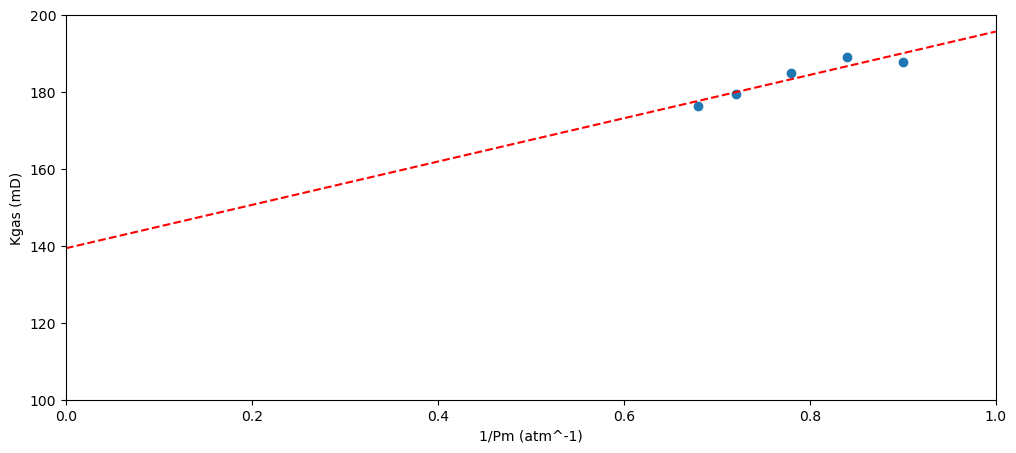

In [88]:
plt.figure(figsize=(12,5))

plt.xlim(0, 1.00)
plt.ylim(100, 200)
plt.scatter(df['Reciprocal pf Pm, 1/Pm(atm^-1)'], df['Permeability of gas, Kgas(mD)'])
plt.plot(arr, line_arr, color = 'r', linestyle = 'dashed')

plt.xlabel('1/Pm (atm^-1)')
plt.ylabel('Kgas (mD)')

plt.show()

### Result

For the used sample:

* Porosity = 22.07%
* Liquid Permeability = 139.34 mD